<a href="https://colab.research.google.com/github/Vinther07/Vinther07/blob/main/When_can_you_retire_user_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
# Description: FIRE retirement strategy Python project

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
# Creating list 
Year = []
Yearly_Income = []
Yearly_Expenses = []
Yearly_Investments =[]
Annual_Returns = []

In [83]:
# Your yearly constant income
income = int(input("What is your yearly income? "))

# What percentage of your income do you need to cover your expences?
expenseratio = int(input("What is your expected expence ratio? (eg. 2 for half or 3 for 33% 1/3)"))
expenses = income / expenseratio
print("Your yearly expenses are set to: " + str(expenses))

# What is your expected annual interest rate? Could use: https://www.afkastforventninger.dk/ as a baseline
interest_rate = float(input("What interest rate do you expect to get? (0.08 for 8%)"))

# Annual investment
investment = income - expenses

# Calculate your annual return based on inputs from ealier
annual_return = float((income - expenses) * interest_rate)

# Printing expected non compounded investment return before taxes
print("Your yearly return on investment before tax is: " + str(annual_return))

#Getting current year 
year = 2021

What is your yearly income? 124800
What is your expected expence ratio? (eg. 2 for half or 3 for 33% 1/3)2
Your yearly expenses are set to: 62400.0
What interest rate do you expect to get? (0.08 for 8%)0.04
Your yearly return on investment before tax is: 2496.0


In [84]:
# Append the first values to the lists
Year.append(year)
Yearly_Income.append(income)
Yearly_Expenses.append(expenses)
Yearly_Investments.append(investment)
Annual_Returns.append(annual_return)

In [85]:
# Loop for "n" years
invested_years = input("How many years do you invest like this? ")
for i in range (0, int(invested_years)-1):
  # Update the investment to be the previous investment plus the previous annual return plus half of your income.
  investment = investment + annual_return + income/2
  # Update the annual return to be the current investment times the interest rate
  annual_return = investment * interest_rate
  # Append new data to the list
  Year.append(year+i+1)
  Yearly_Income.append(income)
  Yearly_Expenses.append(expenses)
  Yearly_Investments.append(investment)
  Annual_Returns.append(annual_return)

How many years do you invest like this? 30


In [86]:
# Create a dataframe
df = pd.DataFrame()
df['Year'] = Year
df['Yearly_Income'] = Yearly_Income
df['Yearly_Expenses'] = Yearly_Expenses
df['Yearly_Investments'] = Yearly_Investments
df['Annual_Returns'] = Annual_Returns

In [87]:
# Show the data
df

,Year,Yearly_Income,Yearly_Expenses,Yearly_Investments,Annual_Returns
0,2021,124800,62400.0,6.240000e+04,2496.000000
1,2022,124800,62400.0,1.272960e+05,5091.840000
2,2023,124800,62400.0,1.947878e+05,7791.513600
3,2024,124800,62400.0,2.649794e+05,10599.174144
4,2025,124800,62400.0,3.379785e+05,13519.141110
5,2026,124800,62400.0,4.138977e+05,16555.906754
6,2027,124800,62400.0,4.928536e+05,19714.143024
7,2028,124800,62400.0,5.749677e+05,22998.708745
8,2029,124800,62400.0,6.603664e+05,26414.657095
9,2030,124800,62400.0,7.491811e+05,29967.243379


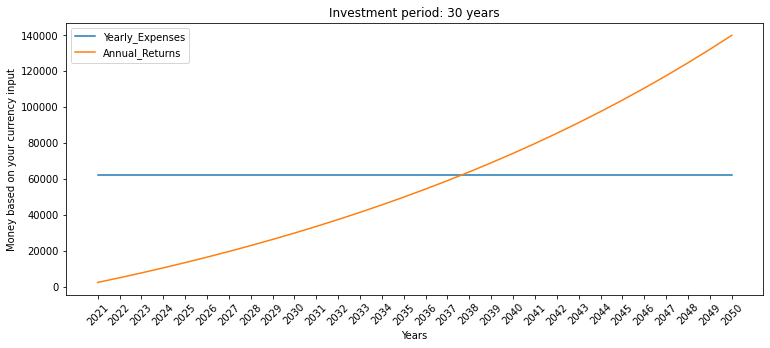

In [88]:
# Vissualize the data
plt.figure(figsize=(12.5, 5))
plt.plot(df['Year'], df['Yearly_Expenses'], label = 'Yearly_Expenses')
plt.plot(df['Year'], df['Annual_Returns'], label = 'Annual_Returns')
plt.xticks(rotation = 45)
plt.title('Investment period: '+ str(invested_years)+ ' years')
plt.xlabel('Years')
plt.ylabel('Money based on your currency input')
plt.xticks(df['Year'])
plt.legend()
plt.show()

In [89]:
# Show the year / row where you can life off your returns
df[df.Yearly_Expenses <= df.Annual_Returns].head(1)

,Year,Yearly_Income,Yearly_Expenses,Yearly_Investments,Annual_Returns
17,2038,124800,62400.0,1.600274e+06,64010.95056
